In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


2024-03-24 12:46:38.528439: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-24 12:46:38.528565: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-24 12:46:38.629229: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.6 MB/s eta 0:00:00:00:01
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [3]:
train_datagen = ImageDataGenerator(rescale=1/225,
                                 shear_range =0.2,
                                 zoom_range =0.2,
                                 horizontal_flip=True)

In [4]:
training_set = train_datagen.flow_from_directory('/kaggle/input/tomatoleaf/tomato/train',
                                                target_size=(64,64),
                                                batch_size=32,
                                                class_mode='categorical')
test_datagen =ImageDataGenerator(rescale =1/225)
test_set = test_datagen.flow_from_directory('/kaggle/input/tomatoleaf/tomato/val',
                                           target_size =(64,64),
                                           batch_size =32,
                                           class_mode='categorical')

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [8]:
from tensorflow import keras
from keras.layers import Conv2D
from keras.layers import Dense
from keras.regularizers import l2

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.regularizers import l2

# Create a Sequential model
cnn = Sequential()

# Step 1 - Convolution
cnn.add(Conv2D(filters=32, padding="same", kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(Conv2D(filters=32, padding='same', kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(Flatten())

# Step 4 - Full Connection
cnn.add(Dense(units=128, activation='relu'))

# Output layer for multi-class classification (10 classes)
cnn.add(Dense(units=10, kernel_regularizer=l2(0.01), activation='softmax'))

# Compile the model with categorical_crossentropy loss
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
r = cnn.fit(training_set, validation_data=test_set, epochs=15)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  strides=1,


Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


  1/313 ━━━━━━━━━━━━━━━━━━━━ 28:47 6s/step - accuracy: 0.0938 - loss: 2.5250

I0000 00:00:1711284590.106761     242 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711284590.124994     242 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


306/313 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 0.2793 - loss: 2.0894

W0000 00:00:1711284652.397151     244 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 73s 217ms/step - accuracy: 0.2833 - loss: 2.0793 - val_accuracy: 0.6030 - val_loss: 1.1464
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step - accuracy: 0.6721 - loss: 1.0353 - val_accuracy: 0.6730 - val_loss: 0.9492
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 103ms/step - accuracy: 0.7617 - loss: 0.7751 - val_accuracy: 0.7400 - val_loss: 0.7799
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.7965 - loss: 0.6651 - val_accuracy: 0.7730 - val_loss: 0.7209
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 102ms/step - accuracy: 0.8102 - loss: 0.6146 - val_accuracy: 0.8100 - val_loss: 0.5740
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.8344 - loss: 0.5368 - val_accuracy: 0.8360 - val_loss: 0.5444
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 105ms/step - accuracy: 0.8460 - loss: 0.4865 - val_accuracy: 0.7230 - val_loss: 0.8830
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 102ms/step - accuracy: 0.8664 - loss: 0.4342 - val

In [11]:
cnn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 821,120 (3.13 MB)

 Trainable params: 273,706 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 547,414 (2.09 MB)

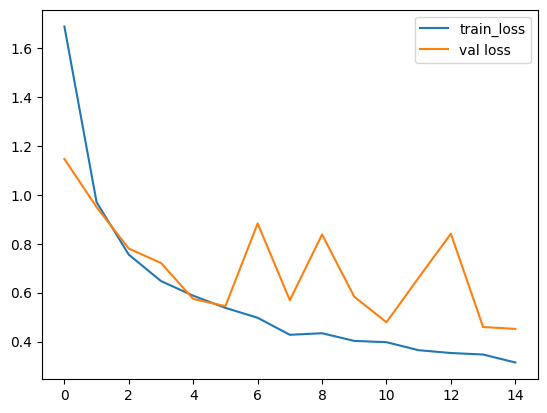

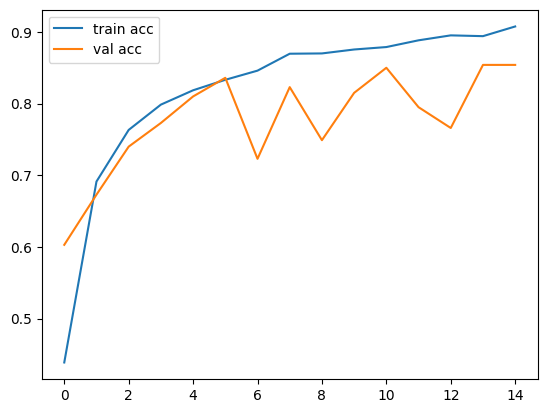

In [12]:
import matplotlib.pyplot as plt
#plotting loss
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('lossVal_loss')
#plotting accuracy
plt.plot(r.history['accuracy'],label ='train acc')
plt.plot(r.history['val_accuracy'],label ='val acc')
plt.legend()
plt.show()


In [14]:
from keras.models import load_model
cnn.save('tomato_dis_using_cnn.h5')

In [15]:
from keras.models import load_model
model =load_model('tomato_dis_using_cnn.h5')

In [16]:
def return_index(result):
    return np.argmax(result)

In [2]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the test image

def tomato_predict(test_image):
    test_image = image.load_img(test_image, target_size=(64, 64))  # Adjust target_size if needed
    test_image = image.img_to_array(test_image)
    test_image = test_image / 255.0  # Normalize pixel values
    test_image = np.expand_dims(test_image, axis=0)

    # Make a prediction
    result = model.predict(test_image)
    a=return_index(result)
    class_labels = {
        0: 'Tomato Bacterial spot',
        1: 'Tomato Early blight',
        2: 'Tomato Late blight',
        3: 'Tomato Leaf Mold',
        4: 'Tomato Septoria leaf spot',
        5: 'Tomato Spider mites Two-spotted spider mite',
        6: 'Tomato Target Spot',
        7: 'Tomato Yellow Leaf Curl Virus',
        8: 'Tomato mosaic virus',
        9: 'Tomato healthy'
    }

    if a in class_labels:
        print(class_labels[a])
    else:
        print('Not a tomato leaf disease')


2024-03-24 13:52:48.110538: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-24 13:52:48.110630: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-24 13:52:48.244082: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
print(model.predict('/kaggle/input/tomatoleaf/tomato/val/Tomato___Target_Spot/0a2de4c5-d688-4f9d-9107-ace1d281c307___Com.G_TgS_FL 7941.JPG'))

NameError: name 'model' is not defined